# UC San Diego: Data Science in Practice - Data Checkpoint
### Summer Session I 2023 | Instructor : C. Alex Simpkins Ph.D.

## UCSD Grade Inflation

# Names

- Emi Lee
- Cindy Luu
- Erwin Miguel Olimpo
- Neda Emdad
- Calvin Nguyen
- Diya Lakhani

<a id='research_question'></a>
# Research Question

How have UCSD students' grade point averages (GPAs) change across various upper division and lower division courses between the years 2007-2022? What factors have influenced these changes, considering the effects of:

* (1) the recent COVID-19 pandemic on student GPAs
* (2) the 2022 UCSD Academic Worker Strike on student GPAs
* (3) the emergence of ChatGPT


# Dataset(s)


- Dataset Name: UCSD CAPEs Data
- Link to the dataset: https://www.kaggle.com/datasets/sanbornpnguyen/ucsdcapes?utm_medium=social&utm_campaign=kaggle-dataset-share
- Number of observations: 63363 rows

The UCSD CAPEs Data is our primary dataset and it contains all the CAPE evaluations from 2007 to 2023 scraped from the CAPEs website  https://capes.ucsd.edu. The dataset contains information about instructors, recommendation rates, average grade recieved, etc. We plan on extracting columns that detail the course name, average grade recieved, and the quarter.

Note: As of this first checkpoint, this one dataset is sufficient to answer the question. However, we may add more datasets later as we are doing the analysis depending on what is required.

# Data Wrangling

The first step is to import the appropriate modules and convert the data from the CSV file to a dataframe.

In [2]:
#importing relevant data libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import plotly.express as px

#converting data from csv file to pandas dataframe
capes = pd.read_csv('raw_data/capes_data.csv')

In [3]:
#defaults for plots
plt.rcParams["figure.figsize"] = (20, 8)

In [4]:
capes.head()

,Instructor,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Evalulation URL
0,Butler Elizabeth Annette,AAS 10 - Intro/African-American Studies (A),SP23,66,48,93.5%,100.0%,2.80,A- (3.84),B+ (3.67),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
1,Butler Elizabeth Annette,AAS 170 - Legacies of Research (A),SP23,20,7,100.0%,100.0%,2.50,A- (3.86),A- (3.92),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
2,Jones Ian William Nasser,ANAR 111 - Foundations of Archaeology (A),SP23,16,3,100.0%,100.0%,3.83,B+ (3.67),NaN,https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
3,Shtienberg Gilad,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,26,6,100.0%,83.3%,3.83,B+ (3.50),B (3.07),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...
4,Braswell Geoffrey E.,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,22,9,100.0%,100.0%,5.17,A (4.00),A (4.00),https://cape.ucsd.edu/CAPEReport.aspx?sectioni...


## Webscraping to create a data of subject dept code to department

In [5]:
html = requests.get(url="https://blink.ucsd.edu/instructors/courses/schedule-of-classes/subject-codes.html").content
soup = BeautifulSoup(html)
soup

<!DOCTYPE html>

<html lang="en-US" xmlns="http://www.w3.org/1999/xhtml">
<head>
<!-- Google Tag Manager -->
<script>
		(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
        new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
        j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
        'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
        })(window,document,'script','dataLayer','GTM-T2BRWXJ');
        </script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="initial-scale=1.0" name="viewport"/>
<meta content="7MiYjX2ZghMOWvtKRWlar--c6mD2ose5EcbQFQ6szFA" name="google-site-verification"/>
<title>Subject Codes</title>
<meta content="University of California, San Diego" name="ORGANIZATION"/>
<meta content="index,follow,noarchive" name="robots"/>
<meta content="Blink" name="SITE"/>
<meta content="Subject Codes" name="P

In [6]:
lst_dept_codes = [tag.text for tag in soup.find_all("td")]
lst_dept_codes

['AAPI',
 'Asian American and Pacific Islander Studies',
 'AAS',
 'African American Studies',
 'AESE',
 'Architecture Based Enterprise Systems Engineering',
 'AIP',
 'Academic Internship Program',
 'ANAR',
 'Anthropological Archaeology',
 'ANBI',
 'Anthropology/ Biological Anthropology',
 'ANES',
 'Anesthesiology',
 'ANSC',
 'Anthro/ Sociocultural Anthropology',
 'ANTH',
 'Anthropology',
 'ASTR',
 'Astronomy and Astrophysics',
 'AUD',
 'Audiology',
 'AWP',
 'Analytical\xa0Writing Program',
 'BENG',
 'Bioengineering',
 'BGGN',
 'Biology/ Grad/ General',
 'BGJC',
 'Biology/ Grad/ Journal Club',
 'BGRD',
 'Biology/ Grad/ Research Discussion',
 'BGSE',
 'Biology/ Grad/ Seminar',
 'BIBC',
 'Biology/ Biochemistry',
 'BICD',
 'Biology/ Genetics, Cellular and Developmental',
 'BIEB',
 'Biology/ Ecology, Behavior, and Evolutionary',
 'BILD',
 'Biology/ Lower Division',
 'BIMM',
 'Biology/ Molecular Biology, Microbiology',
 'BIOM',
 'Biomedical Sciences',
 'BIPN',
 'Biology/ Animal Physiology an

In [7]:
dict_code_to_dept = {}
for i in (range(len(lst_dept_codes)//2)):
    code = lst_dept_codes[2*i]
    dept = lst_dept_codes[2*i+1].replace('\xa0', ' ').replace('/','')
    dict_code_to_dept[code] = dept
dict_code_to_dept

{'AAPI': 'Asian American and Pacific Islander Studies',
 'AAS': 'African American Studies',
 'AESE': 'Architecture Based Enterprise Systems Engineering',
 'AIP': 'Academic Internship Program',
 'ANAR': 'Anthropological Archaeology',
 'ANBI': 'Anthropology Biological Anthropology',
 'ANES': 'Anesthesiology',
 'ANSC': 'Anthro Sociocultural Anthropology',
 'ANTH': 'Anthropology',
 'ASTR': 'Astronomy and Astrophysics',
 'AUD': 'Audiology',
 'AWP': 'Analytical Writing Program',
 'BENG': 'Bioengineering',
 'BGGN': 'Biology Grad General',
 'BGJC': 'Biology Grad Journal Club',
 'BGRD': 'Biology Grad Research Discussion',
 'BGSE': 'Biology Grad Seminar',
 'BIBC': 'Biology Biochemistry',
 'BICD': 'Biology Genetics, Cellular and Developmental',
 'BIEB': 'Biology Ecology, Behavior, and Evolutionary',
 'BILD': 'Biology Lower Division',
 'BIMM': 'Biology Molecular Biology, Microbiology',
 'BIOM': 'Biomedical Sciences',
 'BIPN': 'Biology Animal Physiology and Neuroscience',
 'BISP': 'Biology Special 

In [8]:
dict_code_to_dept["ELWR"]="Entry Level Writing Requirement"
dict_code_to_dept["JUDA"]="Jewish Studies"
dict_code_to_dept["FPMU"]="Family Medicine and Public Health"


Looking at the first few rows of our capes dataframe, there does not seem to be further data wrangling work required. We can shift to data clening. 

# Data Cleaning

Let's begin with checking the dimensions of our data set and the column names.

In [9]:
#returns dimensions of the dataframe
capes.shape

(63363, 11)

In [10]:
#returns column names
capes.columns

Index(['Instructor', 'Course', 'Quarter', 'Total Enrolled in Course',
       'Total CAPEs Given', 'Percentage Recommended Class',
       'Percentage Recommended Professor', 'Study Hours per Week',
       'Average Grade Expected', 'Average Grade Received', 'Evalulation URL'],
      dtype='object')

Our research question is focused on studying the changes in the GPA over various courses between the years 2007-2023. Columns detailing information about the instructor, recommendation rate, study hours, expected grades, evaluation URL, and total CAPEs given can be dropped from our dataset.

In [11]:
#dropping unecessary columns
capes = capes.drop(columns = ['Instructor', 'Percentage Recommended Class',
       'Percentage Recommended Professor', 'Study Hours per Week',
       'Average Grade Expected', 'Evalulation URL', 'Total Enrolled in Course',
       'Total CAPEs Given'])
capes.head()

,Course,Quarter,Average Grade Received
0,AAS 10 - Intro/African-American Studies (A),SP23,B+ (3.67)
1,AAS 170 - Legacies of Research (A),SP23,A- (3.92)
2,ANAR 111 - Foundations of Archaeology (A),SP23,NaN
3,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,B (3.07)
4,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,A (4.00)


There are some cases in which the professor for a course does not report the average grade received by the class. These entries appear as NaN values and those observations need to be dropped. Although, removing NaN values is a part of data wrangling, since we are only concerned about missing values in three columns it was necessary to strip unrequired columns first.

In [12]:
#checking for NaN values
capes.isnull().sum().any()

True

In [13]:
#dropping NaN rows
capes = capes.dropna()

#verifying that our dataframe is free of any missing values
capes.isnull().sum().any()

False

Grades in the 'Average Grade Recieved' column are of the form <letter_grade (GPA)>. In order to analyze how the GPA is changing overtime and take a mean of all the GPAs, we need to split the column into grade (as a string) and GPA (as a float).

In [14]:
#defining function to split the grade
def split_grade_gpa(string):
    lst1 = string.split("(")
    str1 = lst1[1].strip(")")
    return float(str1)

#helper function to extract grade
def split_grade(string):
    lst1 = string.split("(")
    return lst1[0].strip(" ")

cape_GPAs = capes['Average Grade Received'].apply(split_grade_gpa)
cape_grades = capes['Average Grade Received'].apply(split_grade)

#adding GPA column
capes['GPA'] = cape_GPAs
#adding grade column
capes['Grade'] = cape_grades

capes = capes.drop(columns=['Average Grade Received'])
capes.head()

,Course,Quarter,GPA,Grade
0,AAS 10 - Intro/African-American Studies (A),SP23,3.67,B+
1,AAS 170 - Legacies of Research (A),SP23,3.92,A-
3,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,3.07,B
4,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,4.00,A
5,ANBI 111 - Human Evolution (A),SP23,2.95,B-


Similarly, we require a column for department, whether a course is a lower division course or upper division course, and the year. This is so we can groupby quarter, department, and division taking a mean of the GPAs. Then in analysis we will compare the means of every department lower and upper division across every quarter since FA07.

In [15]:
#function to obtain department code
def dept_strip(string):
    lst1 = string.split(" ")
    return lst1[0]

#function to check for lower division / upper division
def ldud(string):
    lst1 = string.split(" ")
    if lst1[1].isalpha() == False:
        str_num = "".join(filter(lambda x: x.isalpha() == False, lst1[1]))
        if int(str_num) <= 99:
            return "LD"
        else:
            return "UD"
    else:
        if int(lst1[1]) <= 99:
            return "LD"
        else:
            return "UD"
    
dept_names = capes['Course'].apply(dept_strip)
upper_lower = capes['Course'].apply(ldud)

#creating a column for upper / lower division
capes['Division'] = upper_lower
#creating a column for department
capes['Dept'] = dept_names

In [16]:
# helper function to extract year from quarter column
def extract_year(string):
    ret_str = "20" + string[2:4]
    return int(ret_str)

years = capes['Quarter'].apply(extract_year)

#creating year column
capes['Year'] = years
capes.head()

,Course,Quarter,GPA,Grade,Division,Dept,Year
0,AAS 10 - Intro/African-American Studies (A),SP23,3.67,B+,LD,AAS,2023
1,AAS 170 - Legacies of Research (A),SP23,3.92,A-,UD,AAS,2023
3,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,3.07,B,UD,ANAR,2023
4,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,4.00,A,UD,ANAR,2023
5,ANBI 111 - Human Evolution (A),SP23,2.95,B-,UD,ANBI,2023


Let's rearrange the columns in an orderly manner so the quarter is the first column.

In [17]:
#rearranging the columns
capes = capes.get(['Quarter', 'Dept', 'Course', 'Division', 'Year', 'GPA', 'Grade'])
capes.head()

,Quarter,Dept,Course,Division,Year,GPA,Grade
0,SP23,AAS,AAS 10 - Intro/African-American Studies (A),LD,2023,3.67,B+
1,SP23,AAS,AAS 170 - Legacies of Research (A),UD,2023,3.92,A-
3,SP23,ANAR,ANAR 115 - Coastal Geomorphology/Environ (A),UD,2023,3.07,B
4,SP23,ANAR,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),UD,2023,4.00,A
5,SP23,ANBI,ANBI 111 - Human Evolution (A),UD,2023,2.95,B-


To compare the means for every department across lower division and upper division courses we need to groupby quarter, department and division. Before that, we are creating a capes_sub df that will not contain the letter grade columns since we cannot obtain a mean of that column.

In [18]:
#Computing the means per course per quater divided by division
capes_sub = capes.get(['Quarter', 'Dept', 'Division', 'Year', 'GPA'])
capes_sub = capes_sub.groupby(['Quarter', 'Dept', 'Division'], sort=False).mean().iloc[::-1].reset_index()
capes_sub = capes_sub[capes_sub['Year'] >= 2013]
capes_sub["Dept Name"] = capes_sub["Dept"].apply(lambda x: dict_code_to_dept[x])
capes_sub.head()


,Quarter,Dept,Division,Year,GPA,Dept Name
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning


In [19]:
capes_sub_wo_sum = capes_sub[~((capes_sub['Quarter'].str.contains("S1")) | (capes_sub['Quarter'].str.contains("S2")) | capes_sub['Quarter'].str.contains("S3"))]

For analysis we will begin with line plots to visualize the increase in GPA across the quarters and proceed with an ANOVA test to compare group means for our three subquestions.

# Data Analysis & Results (EDA)

In order to understand how UCSD students' average GPAs have changed due to the multiple variables we have defined (the COVID-19 pandemic, the 2022 Academic Worker Strike, and the emergence of ChatGPT), it is essential that we visualize our data in multiple different plots. This way, we can examine any increases, decreases, or other interesting behavior in our data and attempt to attribute it's existence to a source in order to supplement and support our research. 

### Overall GPA Avg by Quarter

First, we began with creating a table with just the quarter, year, and GPA columns of our data frame.

In [20]:
capes_by_qtr = capes_sub.get(['Quarter', 'Year', 'GPA']).groupby("Quarter", sort=False).mean().reset_index()
capes_by_qtr

,Quarter,Year,GPA
0,WI13,2013.0,3.313521
1,SP13,2013.0,3.309703
2,S113,2013.0,3.205300
3,S213,2013.0,3.198214
4,S313,2013.0,3.728000
...,...,...,...
56,S222,2022.0,3.430904
57,S322,2022.0,3.535500
58,FA22,2022.0,3.504815
59,WI23,2023.0,3.493449


We used this data to plot the average GPA per quarter, including summer sessions. It is important to note that when plotting our data, we noticed that students' GPAs during summer sessions are significantly higher than non-summer quarters. This is an interesting find, and is something we will explore later.

<Axes: xlabel='Quarter', ylabel='GPA'>

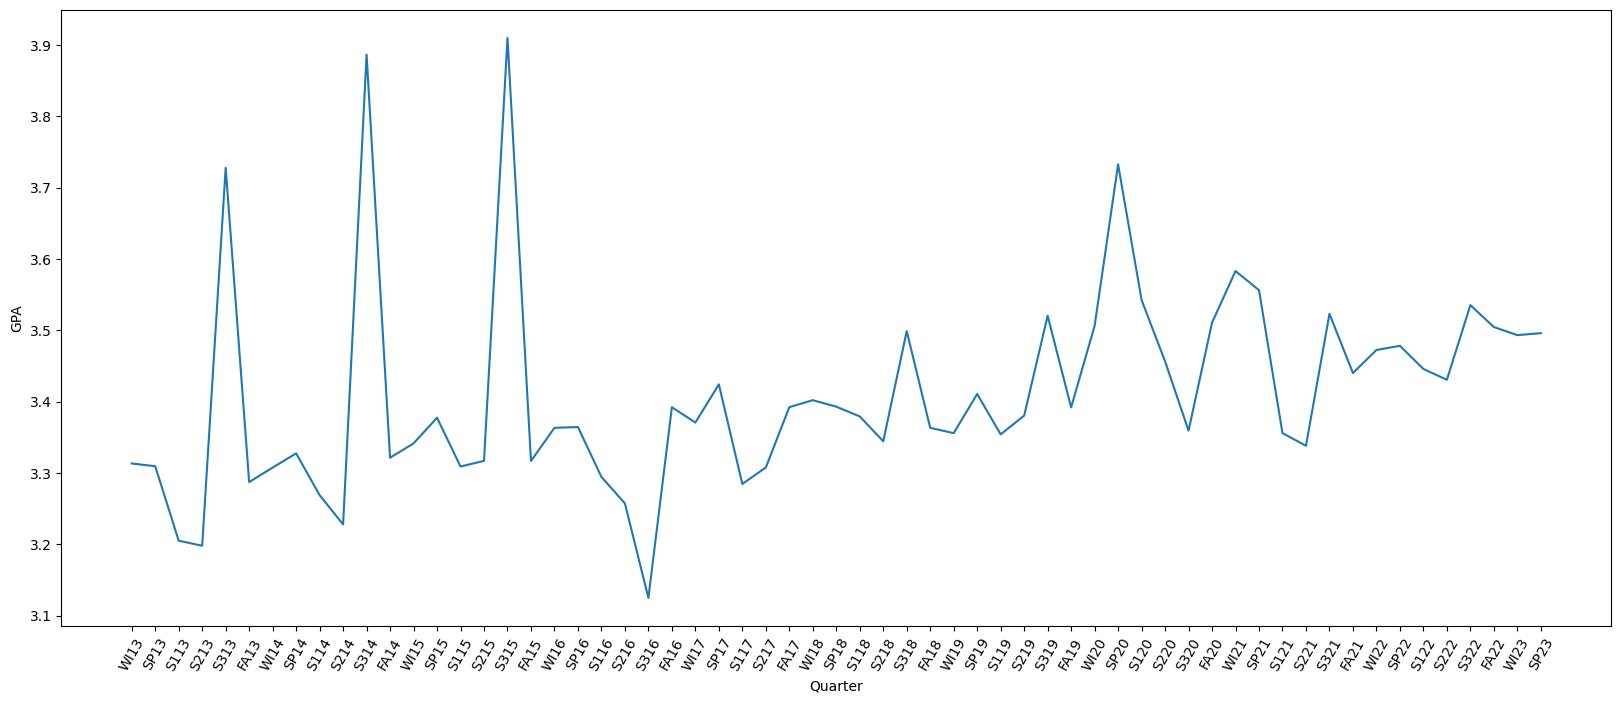

In [21]:
#grouped by quarter to get average GPA per quarter
plt.figure(figsize = (20,8))
plt.xticks(rotation=60)
#lineplot of avg GPA throughout quarters
sns.lineplot(data=capes_by_qtr, x="Quarter", y="GPA")
#summer has huge peaks for some reason so ill show lineplots where one contains summer and the other doesn't

Knowing what we know now, we would like to see the same data, but without summer sessions so that we can see any fluctuations in GPA in regular quarters in the year. We thus removed summer sessions from our data, and plotted the same graph as before, with the Quarter on the x-axis and average GPA on the y-axis.

In [22]:
capes_by_qtr_without_sum = capes_by_qtr[~((capes_by_qtr['Quarter'].str.contains("S1")) | (capes_by_qtr['Quarter'].str.contains("S2")) | capes_by_qtr['Quarter'].str.contains("S3"))]
capes_by_qtr_without_sum.head(10)

,Quarter,Year,GPA
0,WI13,2013.0,3.313521
1,SP13,2013.0,3.309703
5,FA13,2013.0,3.287535
6,WI14,2014.0,3.307740
7,SP14,2014.0,3.327724
11,FA14,2014.0,3.321618
12,WI15,2015.0,3.341683
13,SP15,2015.0,3.377655
17,FA15,2015.0,3.317013
18,WI16,2016.0,3.363539


<Axes: xlabel='Quarter', ylabel='GPA'>

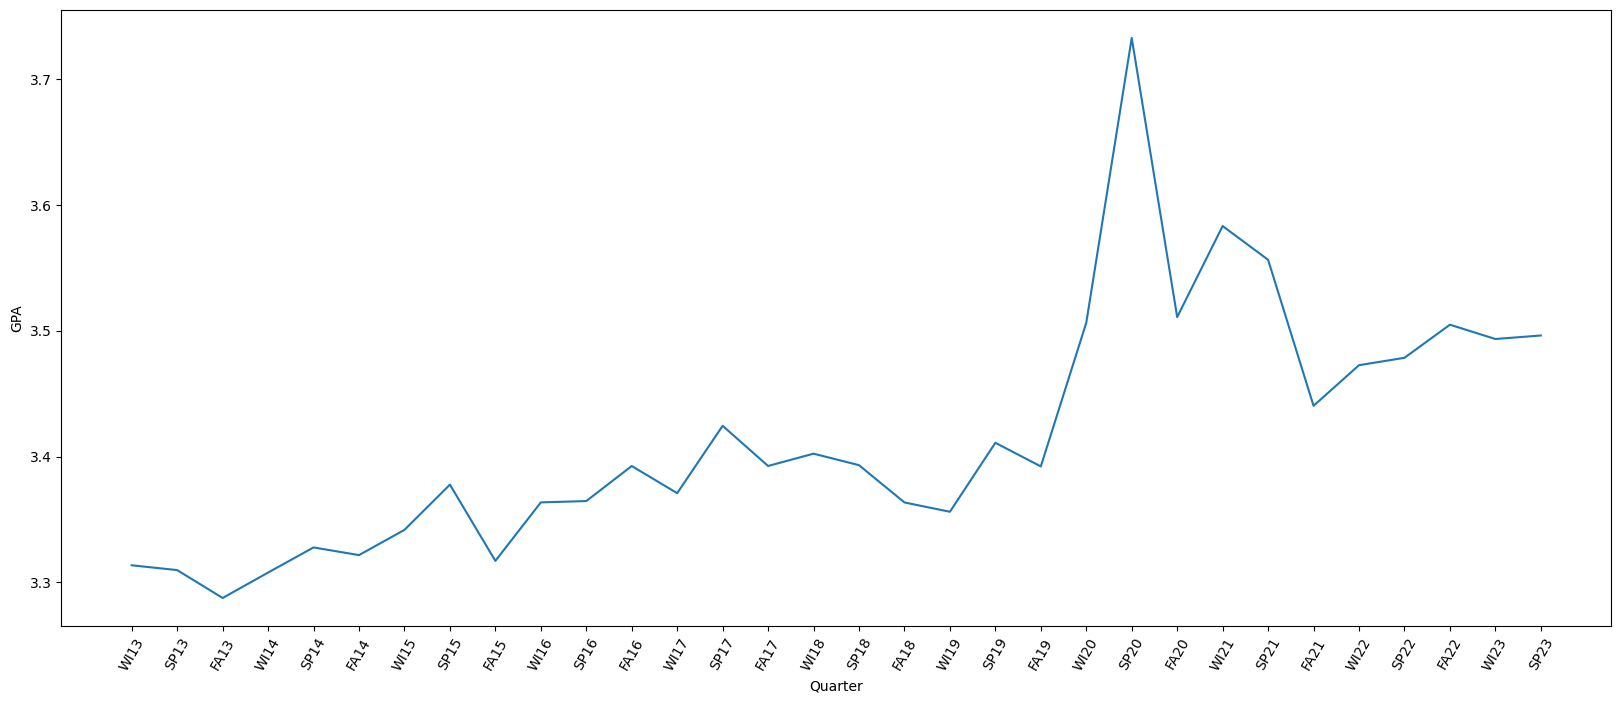

In [23]:
plt.xticks(rotation=60)
sns.lineplot(data=capes_by_qtr_without_sum, x="Quarter", y="GPA")

There is an extremely clear jump in average GPAs for UCSD students in 2020, during and after the Spring 2020 quarter. This is precisely when the COVID-19 pandemic hit, causing the university to enter a remote modality (around mid-March 2020). We can additionally see in our plot that the GPA average remained higher than pre-pandemic averages post SP20.

Now, let's plot this same data (GPA per quarter - excluding summer sessions) in a boxplot.

<Axes: xlabel='Quarter', ylabel='GPA'>

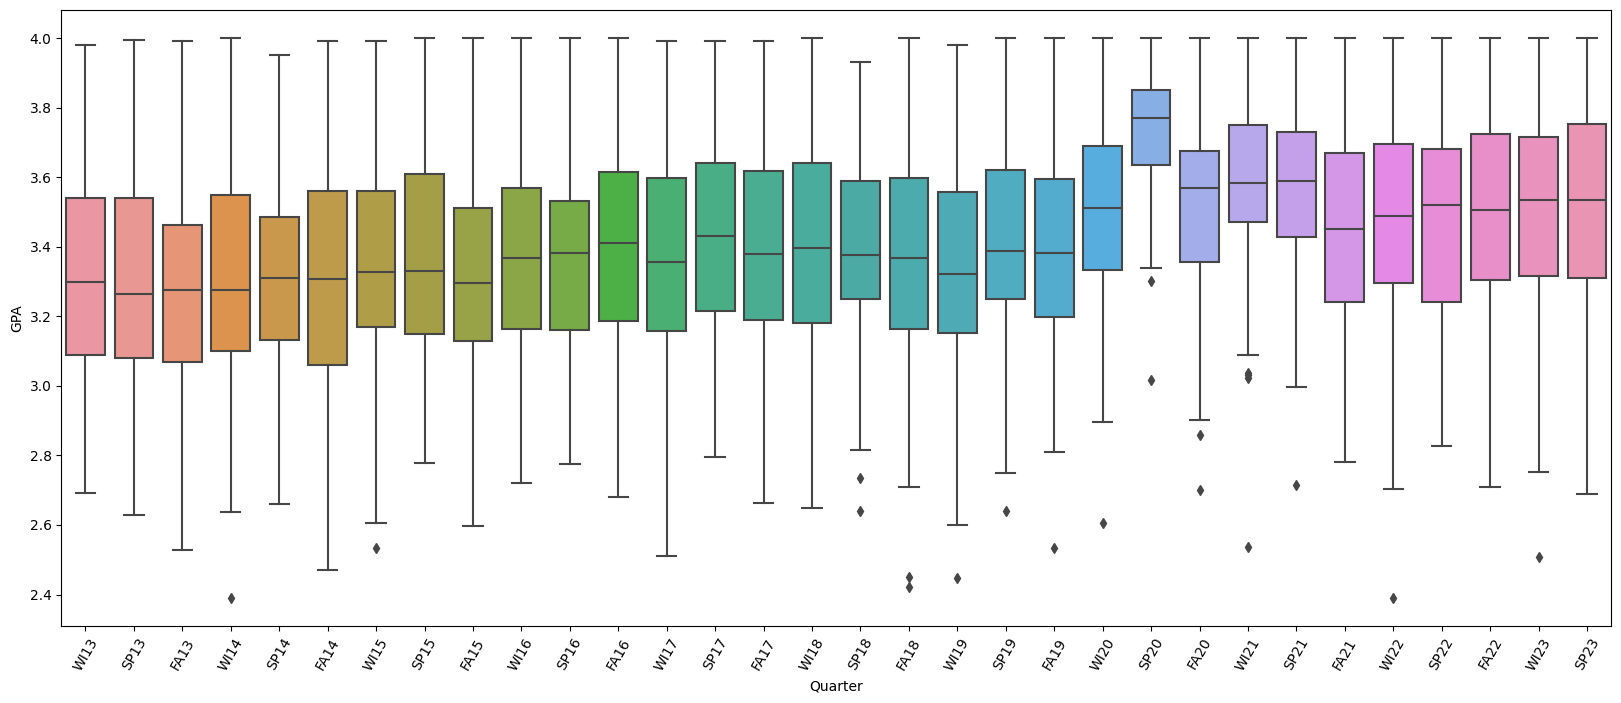

In [24]:
plt.xticks(rotation=60)
sns.boxplot(data=capes_sub_wo_sum, x="Quarter", y="GPA")
#boxplot of quarters

### Lower Divison

In the interest of detail, we additionally would like to visualize our data in terms of lower division classes versus upper division classes, and see if there are discrepencies or similarities in GPA fluctuations between the two class divisions.

First, we begin with a boxplot of the average GPA earned by UCSD students in lower division classes per quarter.

<Axes: xlabel='Quarter', ylabel='GPA'>

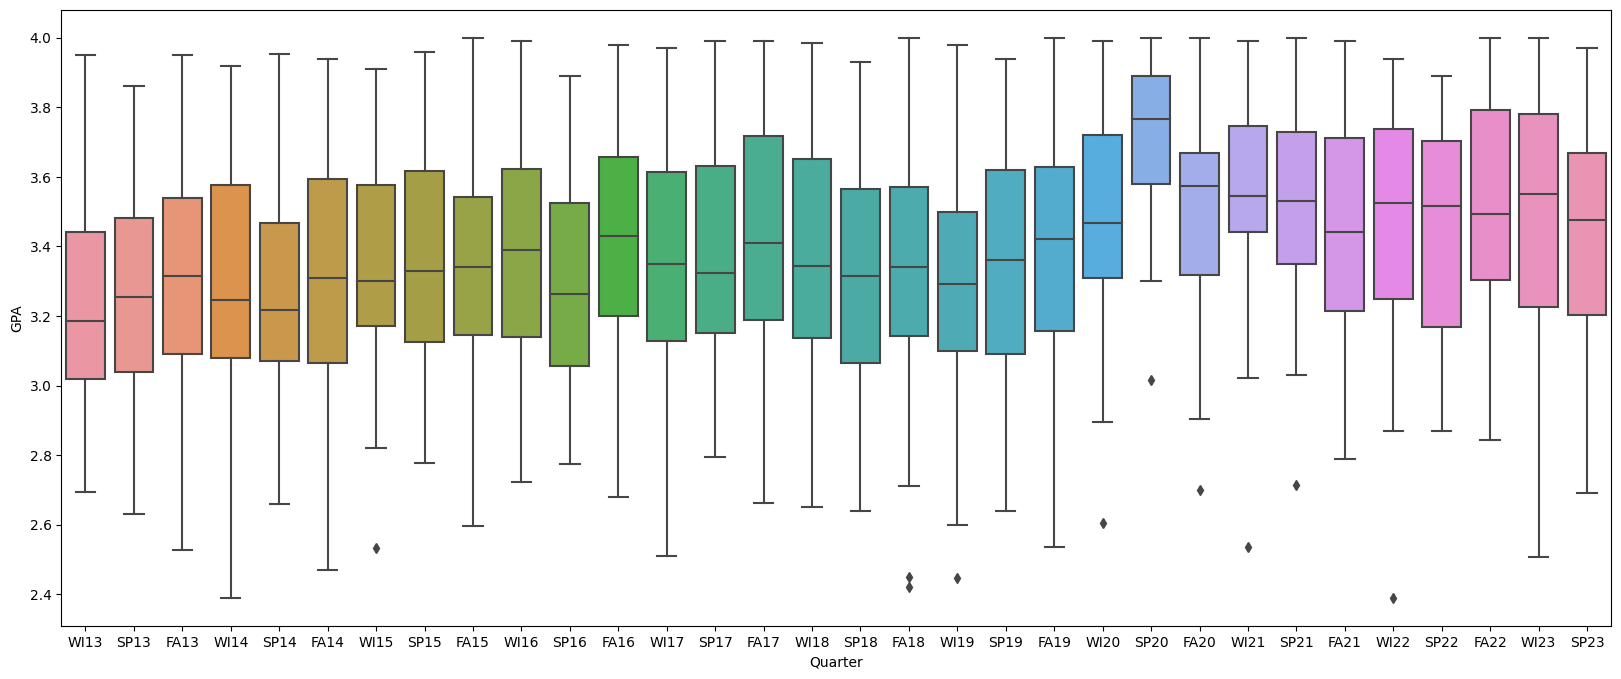

In [25]:
sns.boxplot(data=capes_sub_wo_sum[capes_sub_wo_sum["Division"]=="LD"], x="Quarter", y="GPA")

### Upper Division

Next, we made another boxplot, but this time using data of the average GPA earned by UCSD students in upper division classes per quarter.

<Axes: xlabel='Quarter', ylabel='GPA'>

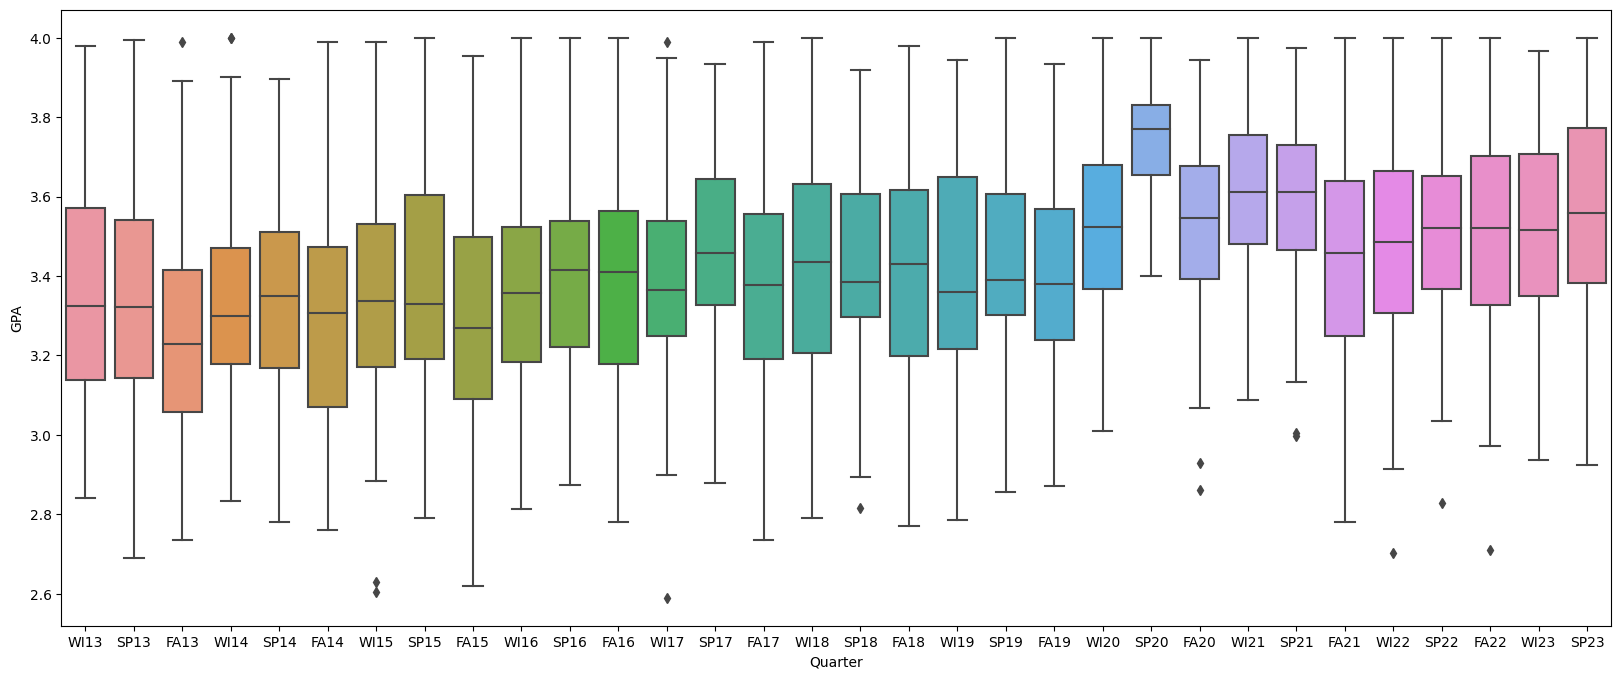

In [26]:
sns.boxplot(data=capes_sub_wo_sum[capes_sub_wo_sum["Division"]=="UD"], x="Quarter", y="GPA")

### COVID-19 Pandemic
We will consider everything during and after SP20 as the pandemic period. In order to clearly see whether or not there was a jump in average GPA earned by UCSD students during the pandemic period versus before, we created a box plot of all data post SP20, excluding summer sessions.

In [27]:
capes_sub_wo_sum["during_pandemic"] = (capes_sub["Year"] >=2021)|(capes_sub["Quarter"] == "SP20")|(capes_sub["Quarter"] == "FA20")
capes_sub_wo_sum

C:\Users\lakha\AppData\Local\Temp\ipykernel_10608\3815074080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capes_sub_wo_sum["during_pandemic"] = (capes_sub["Year"] >=2021)|(capes_sub["Quarter"] == "SP20")|(capes_sub["Quarter"] == "FA20")


,Quarter,Dept,Division,Year,GPA,Dept Name,during_pandemic
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program,False
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts,False
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts,False
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning,False
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning,False
...,...,...,...,...,...,...,...
7355,SP23,ANSC,UD,2023.0,3.548889,Anthro Sociocultural Anthropology,True
7356,SP23,ANBI,UD,2023.0,2.996667,Anthropology Biological Anthropology,True
7357,SP23,ANAR,UD,2023.0,3.535000,Anthropological Archaeology,True
7358,SP23,AAS,UD,2023.0,3.920000,African American Studies,True


<Axes: xlabel='during_pandemic', ylabel='GPA'>

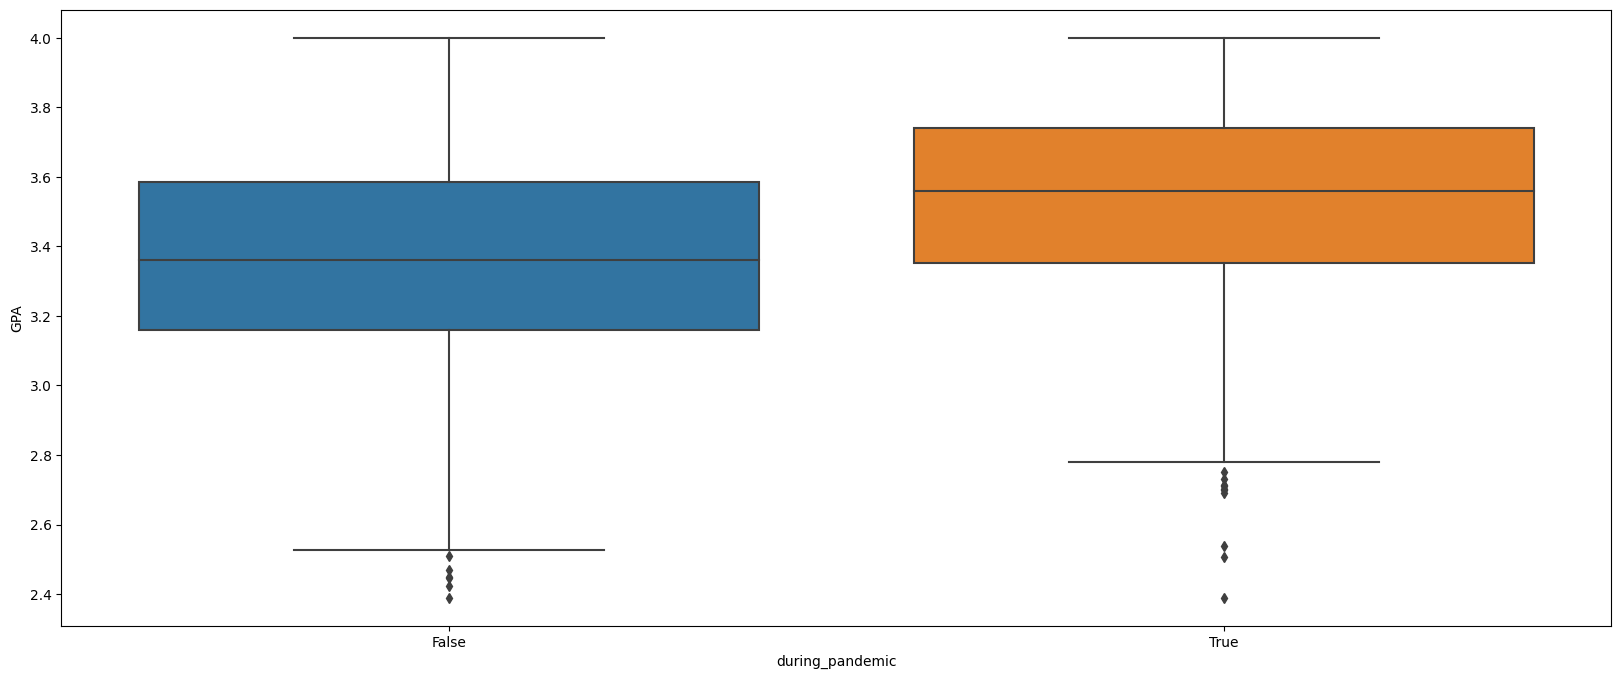

In [28]:
sns.boxplot(data=capes_sub_wo_sum, x="during_pandemic", y="GPA")

It is evident that the average GPA earned by UCSD students during the pandemic period (post SP20 to present day) is higher than before the pandemic period.

### Rise of ChatGPT
ChatGPT rose in popularity in late December, so we will consider WI23 Quarter Onwards as ChatGPT time.

In [29]:
capes_sub_wo_sum["during_chatgpt"] = (capes_sub_wo_sum["Year"] >= 2023)
capes_sub_wo_sum

C:\Users\lakha\AppData\Local\Temp\ipykernel_10608\2876471663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capes_sub_wo_sum["during_chatgpt"] = (capes_sub_wo_sum["Year"] >= 2023)


,Quarter,Dept,Division,Year,GPA,Dept Name,during_pandemic,during_chatgpt
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program,False,False
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts,False,False
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts,False,False
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning,False,False
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning,False,False
...,...,...,...,...,...,...,...,...
7355,SP23,ANSC,UD,2023.0,3.548889,Anthro Sociocultural Anthropology,True,True
7356,SP23,ANBI,UD,2023.0,2.996667,Anthropology Biological Anthropology,True,True
7357,SP23,ANAR,UD,2023.0,3.535000,Anthropological Archaeology,True,True
7358,SP23,AAS,UD,2023.0,3.920000,African American Studies,True,True


<Axes: xlabel='during_chatgpt', ylabel='GPA'>

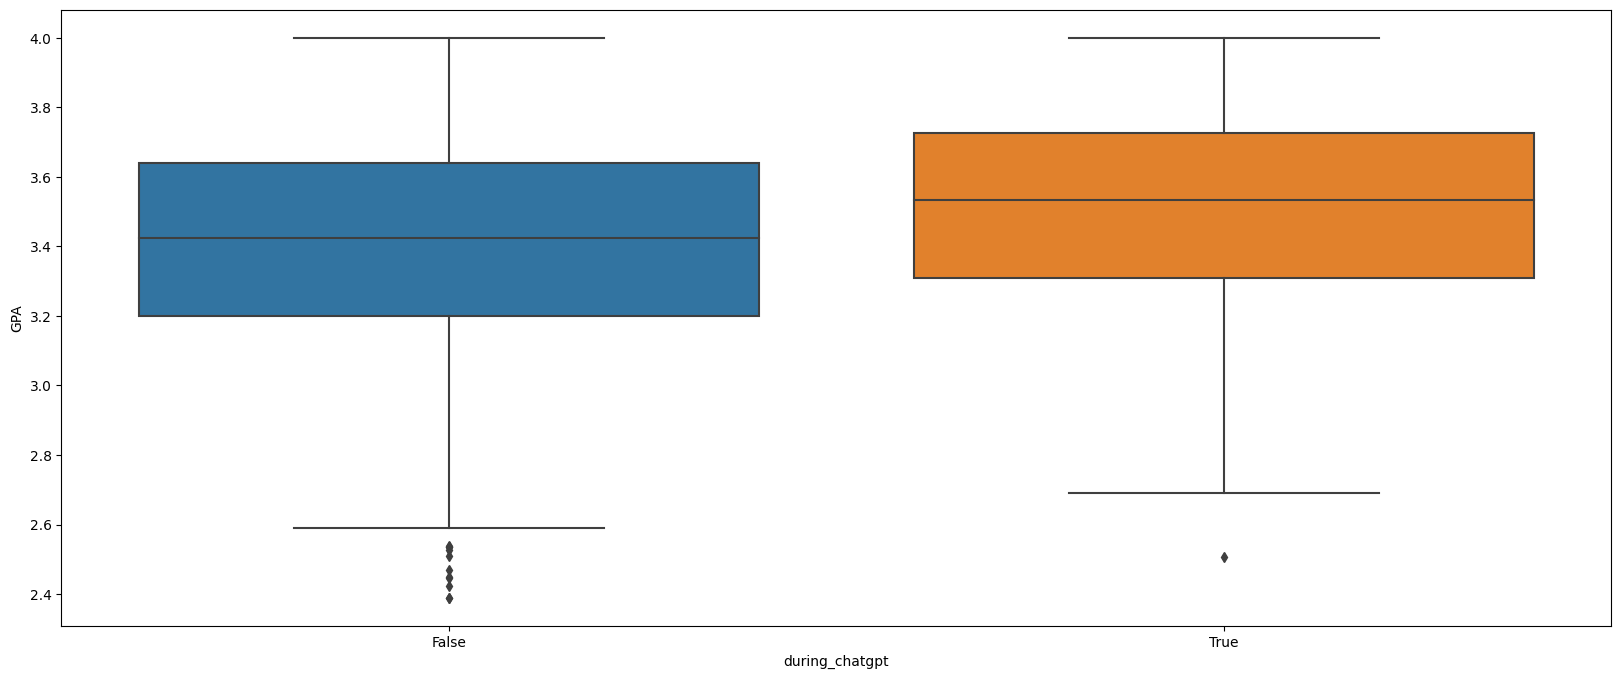

In [30]:
sns.boxplot(data=capes_sub_wo_sum, x="during_chatgpt", y="GPA")

Average GPA earned by UCSD students during WI23 and beyond are indeed higher than the average GPA of a pre-ChatGPT time.

### TA Strike
The TA Strike/Academic Worker Strike only occurred in FA22, so that is the time period we analyzed to see if there were any changes in average GPA during the strike.

In [31]:
capes_sub_wo_sum["during_TA_Strike"] = (capes_sub_wo_sum["Quarter"] == "FA22")
capes_sub_wo_sum


C:\Users\lakha\AppData\Local\Temp\ipykernel_10608\3664347347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capes_sub_wo_sum["during_TA_Strike"] = (capes_sub_wo_sum["Quarter"] == "FA22")


,Quarter,Dept,Division,Year,GPA,Dept Name,during_pandemic,during_chatgpt,during_TA_Strike
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program,False,False,False
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts,False,False,False
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts,False,False,False
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning,False,False,False
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning,False,False,False
...,...,...,...,...,...,...,...,...,...
7355,SP23,ANSC,UD,2023.0,3.548889,Anthro Sociocultural Anthropology,True,True,False
7356,SP23,ANBI,UD,2023.0,2.996667,Anthropology Biological Anthropology,True,True,False
7357,SP23,ANAR,UD,2023.0,3.535000,Anthropological Archaeology,True,True,False
7358,SP23,AAS,UD,2023.0,3.920000,African American Studies,True,True,False


<Axes: xlabel='during_TA_Strike', ylabel='GPA'>

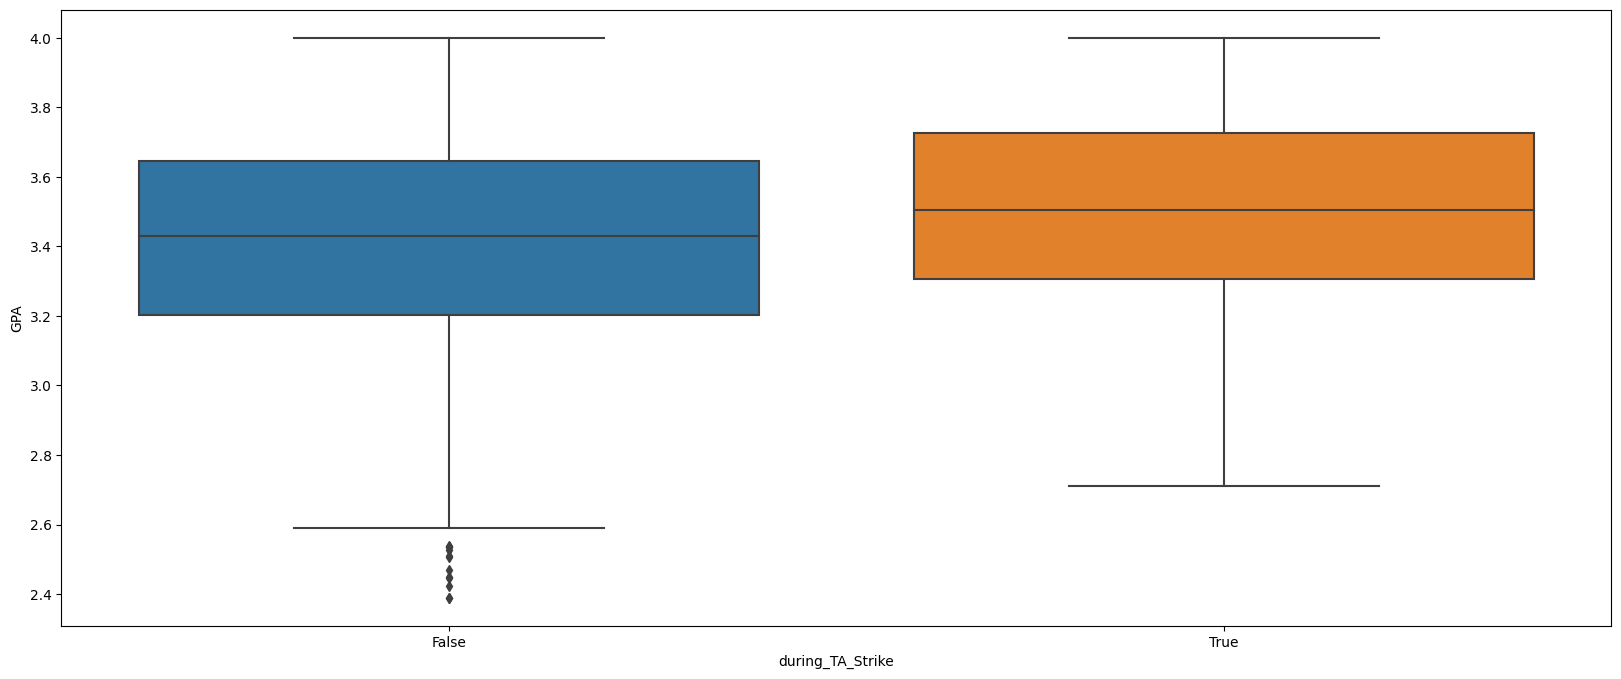

In [32]:
sns.boxplot(data=capes_sub_wo_sum, x="during_TA_Strike", y="GPA")

The average GPA was indeed higher during the TA strike than during times where there was no TA strike.

### By Department

Finally, we wanted to examine GPA earned in different academic departments, in order to obtain a birds-eye view of GPA fluctuations across different departments and whether or not any of our three variables had any effect.

In [33]:
#grouped by quarter and department to get the avg gpa per quarter per department
mean_gpa_by_dept_qtr = capes_sub_wo_sum.groupby(["Quarter", "Dept Name"])[["GPA"]].mean().reset_index()

In [34]:
mean_gpa_by_dept_qtr['Year'] = mean_gpa_by_dept_qtr['Quarter'].apply(extract_year)
mean_gpa_by_dept_qtr = mean_gpa_by_dept_qtr.get(["Year", "Quarter", "Dept Name", "GPA"])
#correcting the order of the quarters
mean_gpa_by_dept_qtr = mean_gpa_by_dept_qtr.sort_values(['Year', 'Quarter'], ascending = [True, False])
mean_gpa_by_dept_qtr.head(5)

,Year,Quarter,Dept Name,GPA
1795,2013,WI13,Anthro Sociocultural Anthropology,3.305000
1796,2013,WI13,Anthropology,3.110000
1797,2013,WI13,Anthropology Biological Anthropology,3.330000
1798,2013,WI13,Bioengineering,3.387333
1799,2013,WI13,Biology Animal Physiology and Neuroscience,3.132500


In [35]:
px.line(mean_gpa_by_dept_qtr, x="Quarter", y="GPA", color="Dept Name", category_orders={"Dept Name": np.sort(mean_gpa_by_dept_qtr["Dept Name"].unique())}
).update_traces(visible="legendonly", selector=lambda t: not t.name in ["Data Science", "Computer Science and Engineering"])
#in this plot you can compare GPA by department by looking through these department names

While the plot above depicts the growth of every course per quarter individually, we can also create a facet lineplot to visualize overall growth in GPA per year for all the departments simultaneously.

In [36]:
# #creating mean by year df
# mean_by_dept = capes.get(['Year','Dept','GPA']).groupby(['Year', 'Dept']).mean().reset_index()
# mean_by_dept_13 = mean_by_dept[mean_by_dept.Year >= 2013]

# sns.set_theme(style="white")

# #creating facet grid (blank grid for every department with the axes)
# img_facet = sns.FacetGrid(mean_by_dept_13, col="Dept", hue="Dept", col_wrap=6, height=1.7)

# #to plot the GPA for every department in their respective grids
# img_facet.map(plt.plot, "Year", "GPA")


Code reference to create image_facet from the website: https://seaborn.pydata.org/examples/many_facets.html

## EDA cont. : Statistical Testing

In [37]:
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [38]:
df = capes_sub_wo_sum
df

,Quarter,Dept,Division,Year,GPA,Dept Name,during_pandemic,during_chatgpt,during_TA_Strike
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program,False,False,False
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts,False,False,False
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts,False,False,False
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning,False,False,False
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning,False,False,False
...,...,...,...,...,...,...,...,...,...
7355,SP23,ANSC,UD,2023.0,3.548889,Anthro Sociocultural Anthropology,True,True,False
7356,SP23,ANBI,UD,2023.0,2.996667,Anthropology Biological Anthropology,True,True,False
7357,SP23,ANAR,UD,2023.0,3.535000,Anthropological Archaeology,True,True,False
7358,SP23,AAS,UD,2023.0,3.920000,African American Studies,True,True,False


### Chi-square testing
Initially opted for Chi-Square until we realized that Year was not numeric but rather categorical which resulted in a rather high P-value

In [39]:
correlation_coefficient = df['Year'].corr(df['GPA'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

Pearson Correlation Coefficient: 0.24309645696067197


### One way ANOVA
Due to this realization that year was categorical, a one way ANOVA was selected as the method of statistical testing performed on both 'Year' and 'Quarter' as independent variables for dependent variable 'GPA'

When performing ANOVA on the GPA by Year (ind), the data suggested very compelling evidence to reject the null hypothesis with a F stat of ~35.3 and a p-val of ~1.065e^-66

Further, a similar result came when performing ANOVA testing on GPA by Quarter (ind) , where the data also suggested compelling evidence to reject the null hypothesis with a F stat of ~14.25 and a p-val of ~8.52e^-70

Due to the extremeness of results towards rejecting the null, this constitutes further investigation into the breakdown of factors contributing to this strong of a difference

Recall that: \
**F Statistic**: Compares variability between group means to variability within groups, higher F values suggest significant differences between groups or regression\
**p Value**: likelihood of getting the results or more extreme (lower = more evidentce to reject the null)

In [40]:
#one way ANOVA for Year
dep = 'GPA'
ind = 'Year'
grouped_data = {group: df[df[ind] == group][dep] for group in df[ind].unique()}
f_statistic, p_value = stats.f_oneway(*grouped_data.values())
print(f"One-way ANOVA F-Statistic: {f_statistic}")
print(f"P-value: {p_value}")

One-way ANOVA F-Statistic: 35.305303736667675
P-value: 1.0652597058107511e-66


In [41]:
#one way ANOVA for Quarter
dep = 'GPA'
ind = 'Quarter'
grouped_data = {group: df[df[ind] == group][dep] for group in df[ind].unique()}
f_statistic, p_value = stats.f_oneway(*grouped_data.values())
print(f"One-way ANOVA F-Statistic: {f_statistic}")
print(f"P-value: {p_value}")

One-way ANOVA F-Statistic: 14.248988149143443
P-value: 8.520436886059617e-70


### Linear Regression (OLS)

Due to the extremeness of the result, we have also elected to perform time series linear regression analysis to further guage the direction of this relationship. To do this, we investigate the coefficient, which in this case was .0241, indicating a postive relationship of GPA increase across years further validated by a low standard error of .002 and high t-statistic of 15.805 across 3979 observations.

This said, however, there are limitations as our dataset , despite ~3k observations, was not able to observe by quarter suggesting the need for further variable encoding. 

In [42]:
df_linreg = df.get(['Year','GPA'])
df_linreg.astype({'Year':'int','GPA':'float'})
df_lr_ind = df_linreg.Year
df_lr_ind = sm.add_constant(df_lr_ind)

x = df_linreg.Year
y = df_linreg.GPA
train_size = int(len(df_linreg)*.8)
train_x, test_x = x[1:train_size], x[train_size:]
train_y, test_y = y[1:train_size], y[train_size:]
model = sm.OLS(df_linreg['GPA'], df_lr_ind)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     249.8
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           1.29e-54
Time:                        16:59:49   Log-Likelihood:                -782.11
No. Observations:                3979   AIC:                             1568.
Df Residuals:                    3977   BIC:                             1581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.1458      3.073    -14.692      0.000     -51.170     -39.121
Year           0.0241      0.002     15.805      0.000       0.021       0.027
==============================================================================
Omnibus:                       50.064   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.926
Skew:                          -0.220   Prob(JB):                     1.06e-10
Kurtosis:                       2.712   Cond. No.                     1.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In order to observe regression quarter-wise, the quarter needs to be converted to a numerical character to producde a scatter plot for regression. We need to clean the data further to obtain a dataframe with a numeric quarter column.

In [43]:
#to check if the quarters are in the correct time series order.
df.Quarter.unique()

array(['WI13', 'SP13', 'FA13', 'WI14', 'SP14', 'FA14', 'WI15', 'SP15',
       'FA15', 'WI16', 'SP16', 'FA16', 'WI17', 'SP17', 'FA17', 'WI18',
       'SP18', 'FA18', 'WI19', 'SP19', 'FA19', 'WI20', 'SP20', 'FA20',
       'WI21', 'SP21', 'FA21', 'WI22', 'SP22', 'FA22', 'WI23', 'SP23'],
      dtype=object)

In [44]:
#creating a funtion to assign a unique number to every year.
def quarter_num(quarter):
    quat = quarter[0:2]
    year = int(quarter[2:4])
    if quat == 'WI':
        num = 1 + (3 * (year - 12 - 1))
        return num
    elif quat == "SP":
        num = 2 + (3 * (year - 12 - 1))
        return num
    else: #for quat == "FA"
        num = 3 + (3 * (year - 12 - 1))
        return num
    
quarter_num('FA19')


21

In [45]:
#creating quart_num column
df['quart_num'] = df['Quarter'].apply(quarter_num)
df.head()

C:\Users\lakha\AppData\Local\Temp\ipykernel_10608\1640370918.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Quarter,Dept,Division,Year,GPA,Dept Name,during_pandemic,during_chatgpt,during_TA_Strike,quart_num
2208,WI13,WCWP,LD,2013.0,3.125000,Warren College Writing Program,False,False,False,1
2209,WI13,VIS,LD,2013.0,3.542000,Visual Arts,False,False,False,1
2210,WI13,VIS,UD,2013.0,3.444286,Visual Arts,False,False,False,1
2211,WI13,USP,LD,2013.0,3.390000,Urban Studies and Planning,False,False,False,1
2212,WI13,USP,UD,2013.0,3.570000,Urban Studies and Planning,False,False,False,1


df.iloc[10:20,:]

<Axes: xlabel='quart_num', ylabel='GPA'>

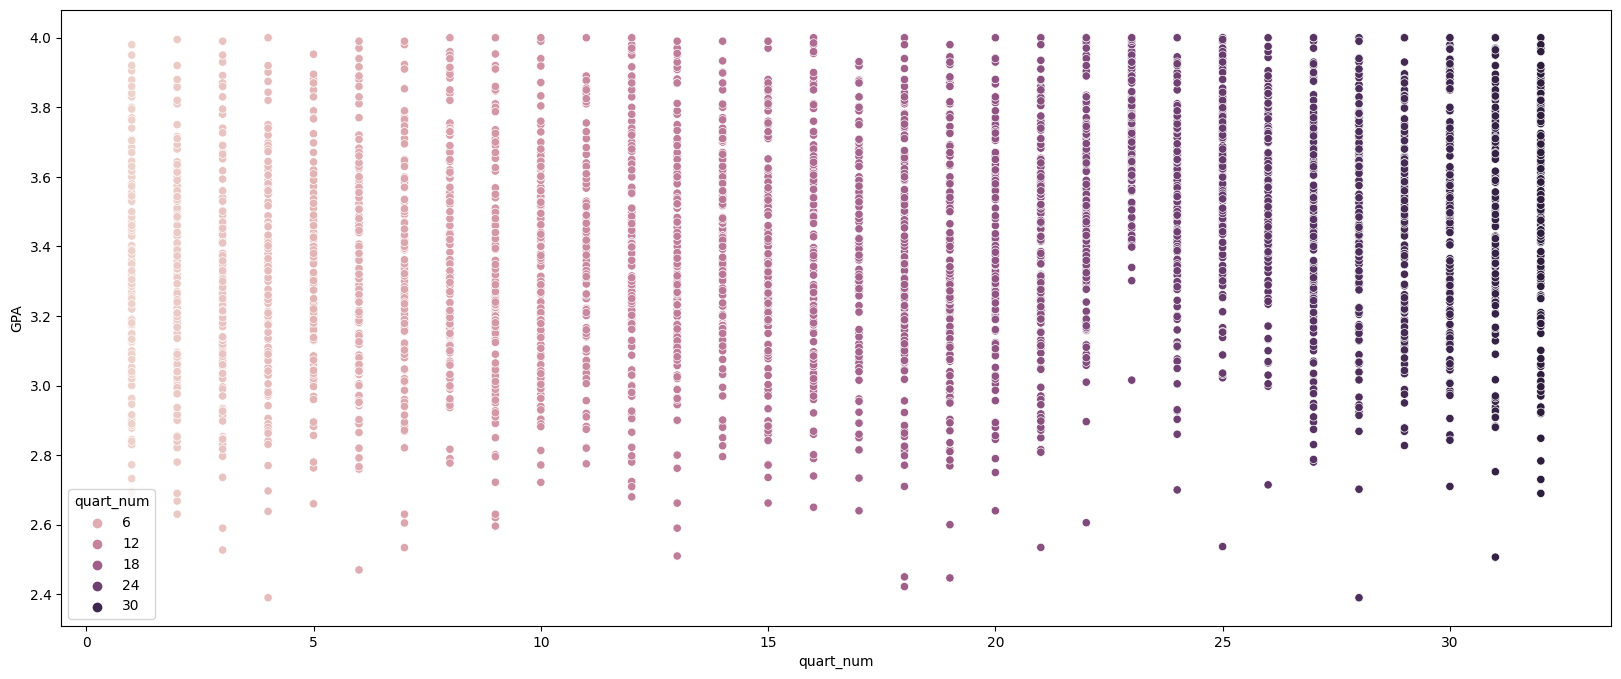

In [46]:
#creating a scatter plot to visualize the GPA growth per quarter
sns.scatterplot(data=df, x='quart_num', y='GPA', hue='quart_num')

In [47]:
#regression per quarter
df_linreg = df.get(['quart_num','GPA'])
df_linreg.astype({'quart_num':'int','GPA':'float'})
df_lr_ind = df_linreg.quart_num
df_lr_ind = sm.add_constant(df_lr_ind)

x = df_linreg.quart_num
y = df_linreg.GPA
train_size = int(len(df_linreg)*.8)
train_x, test_x = x[1:train_size], x[train_size:]
train_y, test_y = y[1:train_size], y[train_size:]
model = sm.OLS(df_linreg['GPA'], df_lr_ind)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     246.3
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           6.83e-54
Time:                        16:59:50   Log-Likelihood:                -783.78
No. Observations:                3979   AIC:                             1572.
Df Residuals:                    3977   BIC:                             1584.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2840      0.010    333.006      0.000       3.265       3.303
quart_num      0.0080      0.001     15.692      0.000       0.007       0.009
==============================================================================
Omnibus:                       50.891   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.539
Skew:                          -0.221   Prob(JB):                     7.84e-11
Kurtosis:                       2.708   Cond. No.                         41.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ANOVA and Regression per Department per Year

Narrowing this further, we have elected to investigate statistical signifance of yearly GPAs by Department per Year, looking at the P-values, F- statistic, and coefficient to gauge significance and direction of change. 

These results reflected similarly to the overall findings of ANOVA per year however gave us clarity into which departments were most significantly impacted. This being said the following breaks down the findings:

Firstly, we seperated each department into its own dataframe with its respective courses where we pulled pvals, fstats and coeff values storing them in a seperate dataframe ``dept_anova``. Two more columns were added indicating whether the pvalues were statistically significant (bool) and if the coefficient was positive or negative (str). Columns that did not qualify for analysis (having inconsistent years with the rest of the dataframe due to abrupt stops or dissolvement of a dept) were dropped and were not counted in the total, n = 111. 

Cumulatively, the mean individual p values fell into the 2.411346e-01 missing the cutoff for statistical significance when not cumulative, thus constituting further investigation as to why this was. When investigating the statistical significance column ``Significant``, there was a total of 71 insignificant and 40 significant results. 

Among the 40 significant results, nearly all departments were humanities related, with the exception of the bio, chem and math departments. 

Among the 71 insignificant results, the departments were generally mixed with departments ranging from Theatre and fine arts to Engineering

However, despite the substantive lack of statistical significance, nearly all results skewed in the positive direction suggesting that though there is no definitive statistically significant grade inflation, as seen by the ``Direction`` column, nearly 85.58% of departments (n = 95) skeweing positively , with only 14.41% (n = 16) skewing negatively.

Among the 14% , there was no direct correlation with STEM or Non-STEM departments in particular, with the most prominent departments being language, theatre, and engineering related. 

At large, due to a lack of substantive evidence we must fail to reject the null hypothesis due to a lack of statistical significant and other potential confounding variables. However, this is not to say grade inflation does not exist, rather, we do not currently have enough evidence to prove that it is statistically significant despite a generally positive skew. 

In [48]:
#Makes unique dataframes for each department only containing all couses that fall under them respectively
depts = df.Dept.unique()
for dept in depts:
    globals()[dept] = df[df['Dept'].str.contains(dept)]

In [49]:
#For reference to see all the different department dataframes
len(df.Dept.unique())

111

In [50]:
#function to run ANOVA test on individual department dfs
def getvals(df):
    f_statistic = 0
    p_value = 0
    dep = 'GPA'
    ind = 'Year'
    grouped_data = {group: df[df[ind] == group][dep] for group in df[ind].unique()}
    f_statistic, p_value = stats.f_oneway(*grouped_data.values())
    return f_statistic, p_value

In [60]:
#Get ANOVA for every department dataframe per year both P and F value, storing them in another dataframe 
list = [WCWP, VIS, USP, TWS, TDTR, TDPR, TDMV, TDHT, TDHD, TDGE, TDDR, TDDE, TDAC, SOCI, SIO, SE, RELI, PSYC, POLI, PHYS, PHIL, NANO, MUS, MMW, MGT, MATH, MAE, LTWR, LTWL, LTTH, LTSP, LTKO, LTEN, LTEA, LTCS, LTCH, LIHL, LIGN, JAPN, INTL, ICAM, HUM, HMNR, HIUS, HISC, HINE, HILD, HILA, HIEU, HIAF, HDP, ETHN, ESYS, ENVR, ENG, EDS, ECON, ECE, DOC, CSE, COMM, COGS, CHIN, CHEM, CGS, CENG, CAT, BISP, BIPN, BIMM, BILD, BIEB, BICD, BIBC, BENG, ANTH, ANSC, ANBI, LAWS, LATI, HIEA, ANAR, LTRU, LTLA, LTIT, LTGM, LTGK, JUDA, FPMU, TDPF, HITO, LTEU, LTFR, GLBH, DSGN, TDPW, ELWR, AAS, FMPH, TDDM, LTAM, DSC, AWP, ERC, HDS, CCS, CSS, SYN, JWSP, GSS, HIGL]
plist = []
flist = []
siglist = []

for ldept in list:
    try:
        get = getvals(ldept)
        p_value = get[1]
        f_statistic = get[0]
        plist.append(p_value)
        flist.append(f_statistic)
        if p_value <= 0.05:
            a = True
            siglist.append(a)
        else: 
            a = False
            siglist.append(a)
    except: 
        plist.append(np.nan)
        flist.append(np.nan)
        a = False
        siglist.append(a)

In [52]:
import warnings
warnings.filterwarnings("ignore")
clist = []
dirlist = []

#running regression for each of the department dataframes per year
for ldept in list:
    df_linreg = ldept.get(['Year','GPA'])
    df_linreg.astype({'Year':'int','GPA':'float'})
    df_lr_ind = df_linreg.Year
    df_lr_ind = sm.add_constant(df_lr_ind)
    
    df_lr_ind = ldept.Year
    df_lr_ind = sm.add_constant(df_lr_ind)

    x = ldept.Year
    y = ldept.GPA
    train_size = int(len(df_linreg)*.8)
    train_x, test_x = x[1:train_size], x[train_size:]
    train_y, test_y = y[1:train_size], y[train_size:]
    model = sm.OLS(ldept['GPA'], df_lr_ind)
    results = model.fit()
    
    v = results.params
    coef = v[-1]
    clist.append(coef)
    if coef > 0:
            e = 'POS'
            dirlist.append(e)
    elif coef < 0: 
            e = 'NEG'
            dirlist.append(e)
    else:
            dirlist.append(np.nan)

In [53]:
dept_anova = pd.DataFrame()
dept_anova['Dept'] = depts
dept_anova['Pval'] = plist
dept_anova['Fval'] = flist
dept_anova['Coeff'] = clist
dept_anova['Significant'] = siglist
dept_anova['Direction'] = dirlist

In [54]:
print(dept_anova.Significant.value_counts())
print(dept_anova.Direction.value_counts())

Significant
False    71
True     40
Name: count, dtype: int64
Direction
POS    95
NEG    16
Name: count, dtype: int64


<Axes: xlabel='Pval', ylabel='Density'>

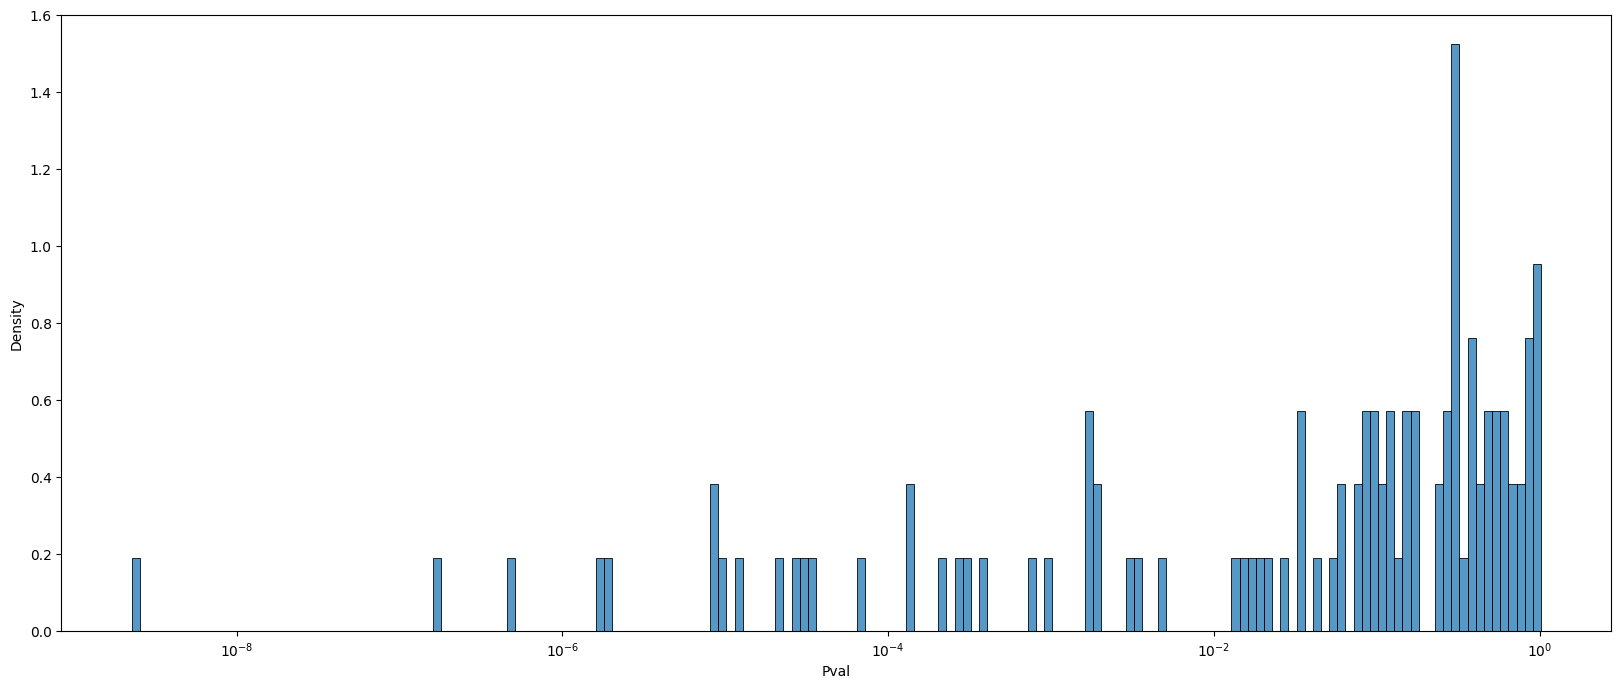

In [78]:
#visualize distribution of the P-values
sns.histplot(data=dept_anova, x="Pval", log_scale=True, binwidth=0.05, stat='density')

In [55]:
dept_anova.describe()

,Pval,Fval,Coeff
count,1.050000e+02,105.000000,111.000000
mean,2.411346e-01,24.943382,0.025919
std,2.896105e-01,223.826004,0.044467
min,2.275107e-09,0.044862,-0.044592
25%,1.868968e-03,1.238424,0.006902
50%,1.084817e-01,1.991127,0.021721
75%,3.834309e-01,4.268571,0.035899
max,9.931560e-01,2296.333333,0.415000


In [56]:
truecount = dept_anova[dept_anova.Significant == True]
truecount

,Dept,Pval,Fval,Coeff,Significant,Direction
0,WCWP,1.745824e-06,7.286063,0.060913,True,POS
1,VIS,2.275107e-09,10.297783,0.030033,True,POS
2,USP,3.311414e-02,2.185347,0.001310,True,POS
9,TDGE,3.549318e-02,2.256122,0.028165,True,POS
13,SOCI,3.377054e-05,5.112048,0.028148,True,POS
14,SIO,2.229148e-04,4.268571,0.019976,True,POS
15,SE,8.774364e-06,4.861396,0.022767,True,POS
17,PSYC,1.713327e-02,2.455545,0.017439,True,POS
18,POLI,2.087189e-05,5.334557,0.021000,True,POS
20,PHIL,1.761191e-03,3.389760,0.028010,True,POS


In [57]:
falsecount = dept_anova[dept_anova.Significant == False]
falsecount

,Dept,Pval,Fval,Coeff,Significant,Direction
3,TWS,0.833533,0.507485,0.036581,False,POS
4,TDTR,0.460715,1.016897,0.014697,False,POS
5,TDPR,0.492490,0.976491,-0.004719,False,NEG
6,TDMV,0.706590,0.714929,0.001522,False,POS
7,TDHT,0.752495,0.663217,0.018040,False,POS
...,...,...,...,...,...,...
105,CCS,0.439585,1.414943,0.033750,False,POS
106,CSS,0.410253,1.100754,0.011957,False,POS
107,SYN,0.165008,2.276011,0.027933,False,POS
108,JWSP,NaN,NaN,0.001732,False,POS


In [80]:
dept_anova

,Dept,Pval,Fval,Coeff,Significant,Direction
0,WCWP,1.745824e-06,7.286063,0.060913,True,POS
1,VIS,2.275107e-09,10.297783,0.030033,True,POS
2,USP,3.311414e-02,2.185347,0.001310,True,POS
3,TWS,8.335331e-01,0.507485,0.036581,False,POS
4,TDTR,4.607149e-01,1.016897,0.014697,False,POS
...,...,...,...,...,...,...
106,CSS,4.102532e-01,1.100754,0.011957,False,POS
107,SYN,1.650080e-01,2.276011,0.027933,False,POS
108,JWSP,NaN,NaN,0.001732,False,POS
109,GSS,9.570645e-01,0.044862,0.025000,False,POS


In [59]:
negcount = dept_anova[dept_anova.Direction == 'NEG']
negcount

,Dept,Pval,Fval,Coeff,Significant,Direction
5,TDPR,0.492490,0.976491,-0.004719,False,NEG
8,TDHD,NaN,NaN,-0.020000,False,NEG
10,TDDR,0.392280,1.141736,-0.003913,False,NEG
11,TDDE,0.944527,0.363572,-0.003424,False,NEG
21,NANO,0.276392,1.282921,-0.000892,False,NEG
26,MAE,0.267456,1.276421,-0.000042,False,NEG
29,LTTH,0.307862,1.748671,-0.044592,False,NEG
34,LTCS,0.311619,1.260165,-0.001909,False,NEG
38,JAPN,0.305782,1.228327,-0.000316,False,NEG
65,CENG,0.173922,1.509498,-0.005322,False,NEG


<Axes: xlabel='Direction', ylabel='count'>

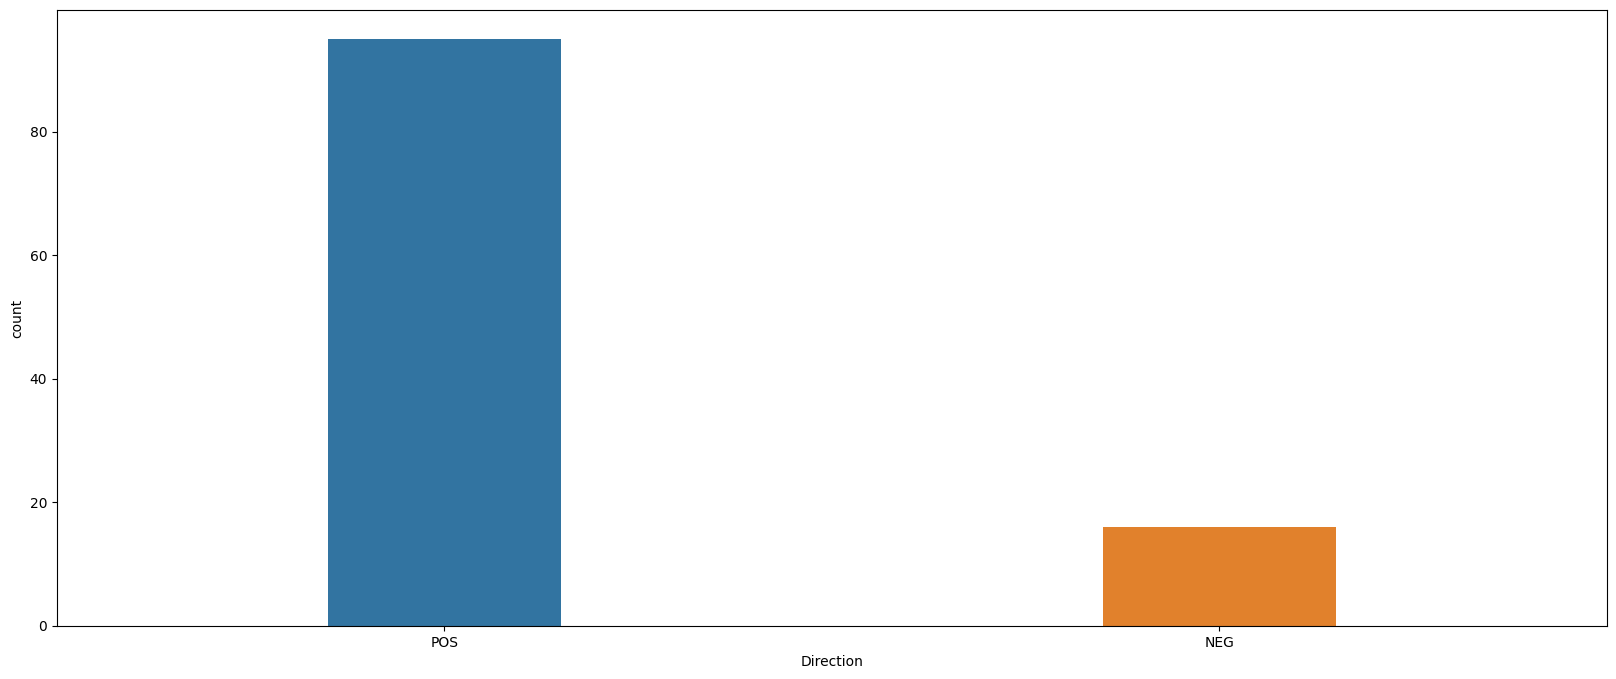

In [85]:
sns.countplot(data=dept_anova, x='Direction', width=0.3)

<Axes: xlabel='Significant', ylabel='count'>

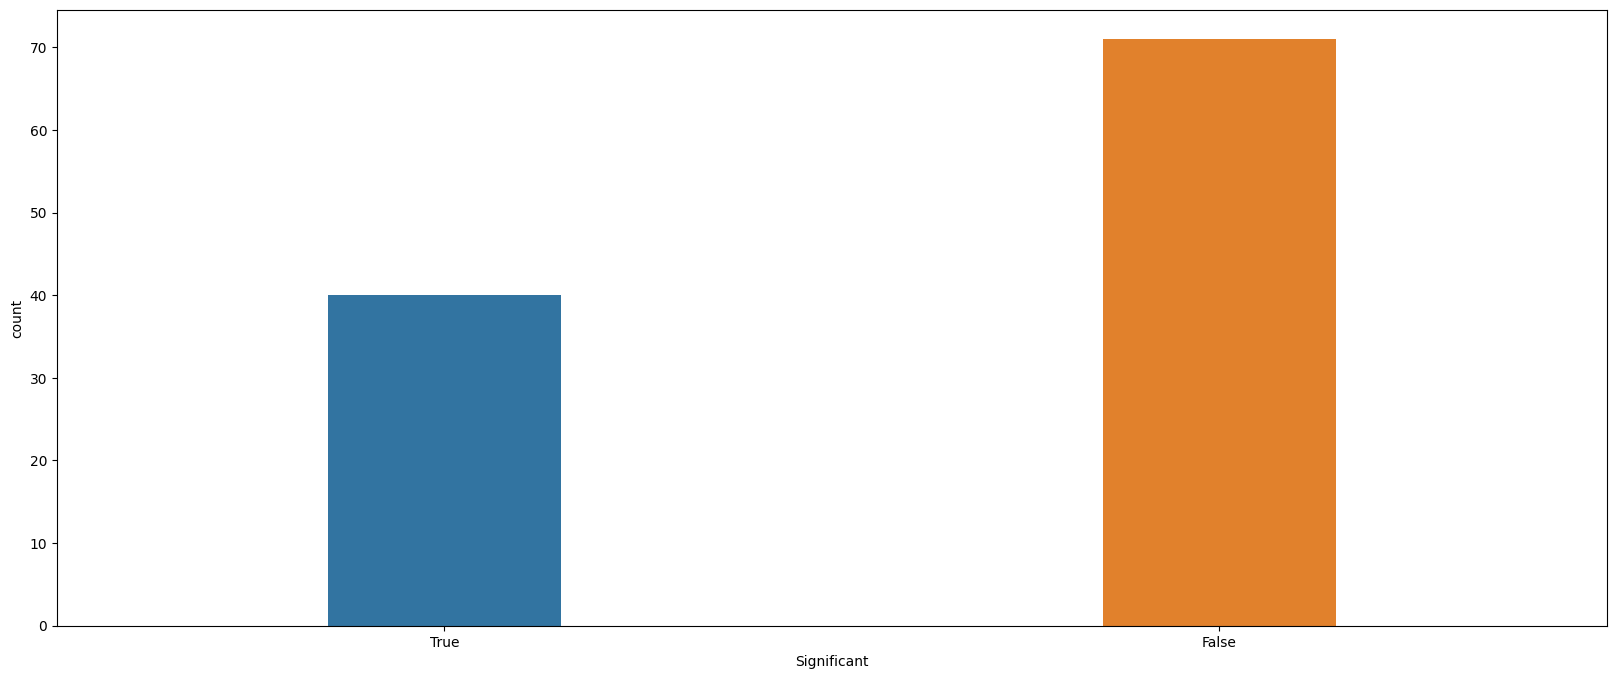

In [90]:
sns.countplot(data=dept_anova, x='Significant', width=0.3, order=[True, False])